(knowing_the_forecast_of_others_v3)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Knowing the Forecasts of Others

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade quantecon
!conda install -y -c plotly plotly plotly-orca

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done
Solving environment: / 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done



## Package Plan ##

  environment location: /usr/share/miniconda3/envs/quantecon

  added / updated specs:
    - plotly
    - plotly-orca


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-orca-1.3.1          |                1        56.6 MB  plotly
    ------------------------------------------------------------
                                           Total:        56.6 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/linux-64::plotly-orca-1.3.1-1



plotly-orca-1.3.1    | 56.6 MB   |                                       |   0% 

plotly-orca-1.3.1    | 56.6 MB   | ##################################### | 100% 
Preparing transaction: \ 

| 

done
Verifying transaction: - 

\ 

| 

/ 

done
Executing transaction: \ 

| 

/ 

- 

done


Retrieving notices: ...working... 

done


## Introduction

Robert E. Lucas, Jr. {cite}`lucas75`, Kenneth Kasa  {cite}`kasa`, and Robert Townsend
{cite}`townsend` showed that putting  decision makers into environments in which they want to infer persistent hidden  state
variables from equilibrium prices and quantities can
elongate and amplify impulse responses to aggregate
shocks.

This provides a promising way to think about amplification mechanisms  in business cycle models.

Townsend {cite}`townsend`
noted  that living in  such environments   makes decision makers  want  to forecast  forecasts of others.

This theme has been pursued  for situations in which
decision makers' imperfect information forces them to pursue an
infinite recursion that involves forming beliefs about the beliefs of others
(e.g., {cite}`ams`).

Lucas {cite}`lucas75` side stepped having decision makers forecast the
forecasts of other decision makers by assuming that they simply **pool their
information** before forecasting.

A **pooling equilibrium** like Lucas's plays a prominent role in this lecture.

Because he didn’t assume such pooling, {cite}`townsend`
confronted the forecasting the forecasts of others problem.

To formulate the  problem recursively required that Townsend define a decision maker's **state** vector.

Townsend concluded that his original  model required an intractable infinite dimensional  state space.

Therefore, he constructed a more manageable approximating model in which a hidden Markov component of
a demand shock is
revealed to all firms after a fixed,  finite number of periods.

In this lecture, we illustrate again the theme that **finding the state is an art** by 
showing how to formulate Townsend's original model in terms of a low-dimensional state space.

We show that Townsend's model shares equilibrium prices and quantities with those   that
prevail in a pooling equilibrium.

That finding emerged from a line of research about  Townsend's model that   built on {cite}`PCL` and that  culminated in
{cite}`Pearlman_Sargent2005` .

Rather than directly deploying the {cite}`PCL` machinery here, we shall instead implement a  sneaky
**guess-and-verify** tactic.

* We first compute a pooling equilibrium and represent it as an instance of  a linear  state-space system provided by
  the Python class `quantecon.LinearStateSpace`.
* Leaving the state-transition equation for the pooling equilibrium unaltered, we alter the observation vector
  for a firm to match what it is in Townsend's original model. So rather than directly observing the signal received by
  firms in the other industry, a firm sees the equilibrium price
  of the good produced by the other industry.
* We compute a population linear least squares regression of the noisy signal at time $t$ that firms in the other
  industry would  receive in a pooling equilibrium on time $t$ information that a firm receives in Townsend's
  original model. 
* The $R^2$ in this regression equals $1$. 
*  That verifies that a firm's information
  set in Townsend's original model equals its information set in a pooling equilibrium.
* Therefore, equilibrium
  prices and quantities in Townsend's original model equal those in a pooling equilibrium.

### A Sequence of Models

We proceed by describing  a sequence of models of two industries that are linked in a
single way: 

* shocks to the demand curves for their products have a common
component.

The models are simplified versions   of Townsend's  {cite}`townsend`.

Townsend's is a model of a rational expectations equilibrium in which firms want to **forecast  forecasts of others**.

In Townsend's model, firms condition  their forecasts on observed endogenous variables whose equilibrium laws of motion
are determined by their own forecasting functions.

We shall  assemble model  components progressively in  ways that can help us to appreciate the structure of the
**pooling equilibrium**  that ultimately interests us.

While keeping all other aspects of the model the same, we shall study
consequences of alternative assumptions about what decision makers
observe.

Technically, this lecture deploys concepts and tools that appear
in  [First Look at Kalman Filter](https://python-intro.quantecon.org/kalman.html) and
[Rational Expectations Equilibrium](https://python-intro.quantecon.org/rational_expectations.html).

## The Setting

We cast all variables in terms of deviations from means.

Therefore,  we omit constants from inverse demand curves
and other functions.

Firms in  industry $i=1,2$ use a single factor of
production, capital $k_t^i$, to produce output of a single good,
$y_t^i$.

Firms bear quadratic costs of adjusting their capital stocks.

A representative firm in industry $i$ has production function
$y_t^i = f k_t^i$, $f >0$.

The firm acts as a price taker with
respect to output price $P_t^i$, and maximizes

```{math}
:label: town1

\begin{aligned}
  E_0^i \sum_{t=0}^\infty \beta^t \left\{ P_t^i f k_t^i - .5
     h (k_{t+1}^i - k_t^i)^2 \right\} ,
  \quad h >0  .\end{aligned}
```

Demand in industry $i$ is described by the inverse demand curve

```{math}
:label: town2

\begin{aligned}
  P_t^i = - b Y_t^i + \theta_t + \epsilon_t^i  , \quad b >0,
  \end{aligned}
```

where $P_t^i$ is the price of good $i$ at $t$,
$Y_t^i = f K_t^i$ is output in market $i$, $\theta_t$
is a persistent component of a demand shock that is common across the
two industries, and $\epsilon_t^i$ is an industry specific
component of the demand shock that is i.i.d. and whose time $t$
marginal distribution is ${\mathcal N}(0, \sigma_{\epsilon}^2)$.

We assume that $\theta_t$ is governed by

```{math}
:label: town2a

\begin{aligned}
  \theta_{t+1} = \rho \theta_t + v_{t}
  \end{aligned}
```

where $\{v_{t}\}$ is an i.i.d. sequence of Gaussian shocks,  each
with mean zero and variance $\sigma_v^2$.

To simplify notation, we’ll study a special case by setting
$h=f=1$.

Costs of adjusting their capital stocks impart to firms an incentive to forecast the price of the
good that they sell.

Throughout, we use the **rational expectations** equilibrium concept presented
in this lecture [Rational Expectations Equilibrium](https://python-intro.quantecon.org/rational_expectations.html).

We let capital letters denote market wide objects and lower case letters
denote objects chosen by a representative firm.

In each industry, a competitive equilibrium prevails.

To rationalize the big $K$, little $k$ connection, we can
think of there being a continuum of  firms in industry $i$, with each firm being indexed by
$\omega \in [0,1]$ and
$K^i = \int_0^1 k^i(\omega) d \omega$.

In equilibrium, $k_t^i = K_t^i$, but  we must distinguish
between $k_t^i$ and $K_t^i$ when we pose the firm’s
optimization problem.

## Tactics

We shall  compute
equilibrium laws of motion for capital in industry $i$ under a
sequence of assumptions about what a representative firm observes.

Successive members of this sequence make a representative firm’s
information more and more obscure.

We begin with the most information, then gradually withdraw information
in a way that approaches and eventually reaches the Townsend-like information
structure that  we are ultimately interested in.

Thus, we shall compute equilibria under the following alternative
information structures:

- **Perfect foresight:** future values of
  $\theta_t, \epsilon_{t}^i$ are observed in industry $i$.
- **Observed history of stochastic** $\theta_t$:
  $\{\theta_t, \epsilon_{t}^i\}$ are realizations from a
  stochastic process; current and past values of each are observed at
  time $t$ but future values are not.
- **One noise-ridden observation on** $\theta_t$: values of
  $\{\theta_t, \epsilon_{t}^i\}$ separately are never observed. However, at
  time $t$, a history $w^t$ of  scalar noise-ridden
  observations on $\theta_t$ is observed at time $t$.
- **Two noise-ridden observations on** $\theta_t$: values of
  $\{\theta_t, \epsilon_{t}^i\}$ separately are never observed. However, at
  time $t$, a history $w^t$ of *two* noise-ridden
  observations on $\theta_t$ is observed at time $t$.

Successive computations build one on previous ones.

We proceed by first finding an equilibrium under perfect foresight.

To compute an equilibrium with current and past but not future values of  $\theta_t$ observed, we use a
*certainty equivalence principle* to justify modifying the perfect
foresight equilibrium by replacing future values of
$\theta_s, \epsilon_{s}^i, s \geq t$ with mathematical
expectations conditioned on $\theta_t$.

This provides the equilibrium when $\theta_t$ is observed at
$t$ but future $\theta_{t+j}$ and
$\epsilon_{t+j}^i$ are not observed.

To find an equilibrium when a history $w^t$ observations  of a **single** noise-ridden 
 $\theta_t$ is observed, we again apply a
certainty equivalence principle and replace future values of the random
variables $\theta_s, \epsilon_{s}^i, s \geq t$ with their
mathematical expectations conditioned on $w^t$.

To find an equilibrium when  a history $w^t$ of  **two** noisy
signals on $\theta_t$ is observed, we replace future values of the
random variables $\theta_s, \epsilon_{s}^i, s \geq t$ with their
mathematical expectations conditioned on history $w^t$.

We call the equilibrium with two noise-ridden observations on $\theta_t$ a **pooling equilibrium**.

- It corresponds to an arrangement in which at the beginning of each
  period firms in industries $1$ and $2$ somehow get
  together and share information about current values of their noisy
  signals on $\theta$.

We want ultimately to compare outcomes in  a pooling equilibrium
with an equilibrium under the following alternative information structure for a firm
in industry $i$ that originally interested Townsend {cite}`townsend`:

- **Firm** $i$’s **noise-ridden signal on** $\theta_t$ **and the
  price in industry** $-i$, a firm in industry
  $i$ observes a history $w^t$ of *one* noise-ridden signal
  on $\theta_t$ and a history of industry $-i$’s price is
  observed. (Here $-i$ means ``not $i$''.)

With this information structure, a representative firm $i$ sees the price as well as the
aggregate endogenous state variable $Y_t^i$ in its own industry.

That allows it to  infer
the total demand shock $\theta_t + \epsilon_{t}^i$.

However, at time $t$, the firm sees only $P_t^{-i}$ and does
not see $Y_t^{-i}$, so that a firm in industry $i$ does not **directly**
observe $\theta_t + \epsilon_t^{-i}$.

Nevertheless, it will turn out that   equilibrium prices and quantities in this equilibrium equal
their counterparts in a pooling equilibrium because
firms in industry $i$ are able to infer the noisy signal about the demand shock
received by firms in industry $-i$.

We shall verify this assertion  by using a guess and verify tactic that involves running a least 
squares regression and inspecting its $R^2$. [^footnote0]

## Equilibrium Conditions

It is convenient to solve a firm’s problem without
uncertainty  by forming the Lagrangian:

$$
\begin{aligned}
J=\sum_{t=0}^\infty \beta^t \left\{
P_t^i  k_t^i - .5   (\mu_t^i)^2  + \phi_t^i \left[
   k_t^i + \mu_t^i - k_{t+1}^i \right]  \right\} \end{aligned}
$$

where  $\{\phi_t^i\}$ is a sequence of Lagrange multipliers on the
transition law $k_{t+1}^i = k_{t}^i + \mu_t^i$.

First order conditions for the
nonstochastic problem are

```{math}
:label: town4

\begin{aligned}
  \phi_t^i & =  \beta \phi_{t+1}^i + \beta  P_{t+1}^i   \\
  \mu_t^i & =  \phi_t^i .   \end{aligned}
```

Substituting the demand function {eq}`town2` for
$P_t^i$, imposing the condition $k_t^i = K_t^i$ that makes representative firm be
representative, and using  definition {eq}`town7`
of $g_t^i$, the Euler equation {eq}`town4` lagged
by one period can be expressed as
$- b k_t^i + \theta_t + \epsilon_t^i + (k_{t+1}^i - k_t^i) - g_t^i =0$
or

```{math}
:label: pcl11

\begin{aligned}
  k_{t+1}^i = (b+1) k_t^i - \theta_t - \epsilon_t^i + g_t^i
  \end{aligned}
```

where we define $g_t^i$ by

```{math}
:label: town7

g_t^i = \beta^{-1} (k_t^i - k_{t-1}^i)
```

We can write  Euler equation {eq}`town4` as:

```{math}
:label: pcl10

\begin{aligned}
  g_t^i = P_t^i + \beta g_{t+1}^i
  \end{aligned}
```

In addition, we have the law of motion for $\theta_t$,
{eq}`town2a`, and the demand equation
{eq}`town2`.

In summary, with perfect foresight, equilibrium conditions for industry
$i$ comprise  the following system of difference equations:

```{math}
:label: sol1

\begin{aligned}
  k_{t+1}^i & =  (1+b)k_t^i - \epsilon_t^i -\theta_t + g_t^i \\
  \theta_{t+1} & =  \rho \theta_t + v_t \\
  g_{t+1}^i  & = \beta^{-1} (g_t^i - P_t^i)   \\
  P_t^i & =  -b k_t^i + \epsilon_t^i + \theta_t  \end{aligned}
```

Without perfect foresight, the same system prevails except that the
following equation replaces the third equation of {eq}`sol1`:

$$
\begin{aligned}
g_{t+1,t}^i = \beta^{-1} (g_t^i - P_t^i) \end{aligned}
$$

where
$x_{t+1,t}$ denotes the mathematical expectation of
$x_{t+1}$ conditional on information at time $t$.

### Equilibrium under perfect foresight

Our first step is to compute the equilibrium law of motion for
$k_t^i$ under perfect foresight.

Let $L$ be the lag
operator. [^footnote3]

Equations {eq}`pcl10` and {eq}`pcl11`
imply the second order difference equation in
$k_t^i$: [^footnote4]

```{math}
:label: euler1

\begin{aligned}
  \left[ (L^{-1} - (1+b))(1-\beta L^{-1}) + b\right] k_t^i
  = \beta L^{-1} \epsilon_t^i + \beta L^{-1} \theta_t .
  \end{aligned}
```

Factor the polynomial in $L$ on the left side as:

$$
\begin{aligned}
-\beta [L^{-2} -(\beta^{-1} + (1+b))L^{-1} + \beta^{-1}]
= \tilde \lambda^{-1}(L^{-1} - \tilde \lambda)(1-\tilde \lambda \beta L^{-1})
\end{aligned}
$$

where $|\tilde \lambda | < 1$ is the smaller root and
$\lambda$ is the larger root of
$(\lambda-1)(\lambda-1/\beta)=b\lambda$.

Therefore, {eq}`euler1` can be expressed as

$$
\begin{aligned}
\tilde \lambda^{-1}(L^{-1} - \tilde \lambda) (1-\tilde \lambda \beta L^{-1})
k_t^i = \beta L^{-1} \epsilon_t^i + \beta L^{-1} \theta_t .
\end{aligned}
$$

Solving the stable root backwards and the unstable root forwards gives

$$
\begin{aligned}
k_{t+1}^i = \tilde \lambda k_t^i + {\tilde \lambda \beta \over 1 -\tilde
\lambda \beta L^{-1}}
(\epsilon_{t+1}^i + \theta_{t+1}  ) .
\end{aligned}
$$

Recall that we have already set $k^i = K^i$ at the appropriate point in the argument, namely, _after_ having derived the first-order necessary
conditions for a representative firm in industry $i$.

Thus,  under perfect foresight the equilibrium capital stock in industry $i$ satisfies

```{math}
:label: town5

\begin{aligned}
  k_{t+1}^i = \tilde \lambda k_t^i + \sum_{j=1}^\infty (\tilde \lambda \beta)^j
  (\epsilon_{t+j}^i +  \theta_{t+j}) .
  \end{aligned}
```

Next, we shall investigate consequences of replacing future  values of
$(\epsilon_{t+j}^i +  \theta_{t+j})$ in equation {eq}`town5`  with alternative forecasting schemes.

In particular, we shall compute   equilibrium laws of motion for capital
under alternative assumptions about  information available to
firms in market $i$.

## Equilibrium with $\theta_t$ stochastic but observed at $t$

If future $\theta$’s are unknown at $t$, it is appropriate
to replace all random variables on the right side of
{eq}`town5` with their conditional expectations based on
the information available to decision makers in market $i$.

For now, we assume that this information set is
$I_t^p = \begin{bmatrix} \theta^t & \epsilon^{it} \end{bmatrix}$,
where $z^t$ represents the semi-infinite history of variable
$z_s$ up to time $t$.

Later we shall give firms less information.

To obtain an appropriate counterpart to {eq}`town5` under our
current assumption about information, we apply a certainty equivalence
principle.

In particular, it is appropriate to take {eq}`town5` and
replace each term $( \epsilon_{t+j}^i+ \theta_{t+j} )$ on the
right side with
$E[ (\epsilon_{t+j}^i+ \theta_{t+j}) \vert \theta^t ]$.

After using {eq}`town2a` and the i.i.d. assumption about
$\{\epsilon_t^i\}$, this gives

$$
\begin{aligned}
k_{t+1}^i = \tilde \lambda k_t^i + {\tilde \lambda \beta \rho \over 1 -
\tilde \lambda \beta \rho }
\theta_t
\end{aligned}
$$

or

```{math}
:label: solution1

\begin{aligned}
  k_{t+1}^i = \tilde \lambda k_t^i  + {\rho \over  \lambda - \rho} \theta_t
  \end{aligned}
```

where $\lambda \equiv (\beta \tilde \lambda)^{-1}$.

For our purposes, it is convenient to represent the equilibrium
$\{k_t^i\}_t$ process recursively as

```{math}
:label: sol10

\begin{aligned}
  k_{t+1}^i  & =  \tilde \lambda k_t^i  + {1 \over \lambda - \rho}
  \hat \theta_{t+1}  \\
  \hat \theta_{t+1}  & =  \rho \theta_t \\
  \theta_{t+1} & =  \rho \theta_t + v_t.   \end{aligned}
```

### Filtering

#### One noisy signal

We get closer to the original Townsend  model that interests us  by now
assuming that firms in market $i$ do not observe $\theta_t$.

Instead they observe a history  $w^t$ of noisy signals at time $t$.

In particular, assume that

```{math}
:label: kf1&2

\begin{aligned}
  w_t  & =   \theta_t + e_t  \\
  \theta_{t+1} & =  \rho \theta_t + v_t
  \end{aligned}
```

where $e_t$ and $v_t$ are mutually independent
i.i.d. Gaussian shock processes with means of zero and variances
$\sigma_e^2$ and $\sigma_v^2$, respectively.

Define

$$
\begin{aligned}
\hat \theta_{t+1} = E(\theta_{t+1} | w^t)
\end{aligned}
$$

where $w^t = [w_t, w_{t-1}, \ldots, w_0]$ denotes the history of the $w_s$ process up to
and including $t$.

Associated with the  state-space representation
{eq}`kf1&2` is the time-invariant *innovations
representation*

```{math}
:label: kf3&4

\begin{aligned}
  \hat \theta_{t+1}  & =     \rho \hat \theta_t + \kappa a_t  \\
  w_t & =  \hat \theta_t + a_t
  \end{aligned}
```

where $a_t \equiv w_t - E(w_t | w^{t-1})$ is the *innovations*
process in $w_t$ and the Kalman gain $\kappa$ is

```{math}
:label: kal1

\begin{aligned}
  \kappa = {\rho p \over p + \sigma_e^2} \end{aligned}
```

and where $p$ satisfies the Riccati equation

```{math}
:label: kf6

\begin{aligned}
  p = \sigma_v^2   + { p \rho^2 \sigma_e^2 \over \sigma_e^2 + p}.
  \end{aligned}
```

#### State-reconstruction error

Define the state *reconstruction error* $\tilde \theta_t$ by

$$
\begin{aligned}
\tilde \theta_t = \theta_t - \hat \theta_t .
\end{aligned}
$$

Then $p = E \tilde \theta_t^2$.

Equations {eq}`kf1&2` and {eq}`kf3&4` imply

```{math}
:label: kf7

\begin{aligned}
  \tilde \theta_{t+1} = (\rho - \kappa) \tilde \theta_t + v_t - k e_t .
  \end{aligned}
```

Notice that we can express $\hat \theta_{t+1}$ as

```{math}
:label: kf8

\hat \theta_{t+1}   = [\rho \theta_t + v_t]  + [ \kappa e_t - (\rho -\kappa) \tilde \theta_t - v_t]  ,
```

where the first term in braces  equals
$\theta_{t+1}$ and the second term in braces equals
$-\tilde \theta_{t+1}$.

We can express {eq}`solution1` as

```{math}
:label: solution2

\begin{aligned}
  k_{t+1}^i = \tilde \lambda k_t^i + {1 \over \lambda - \rho}
  E \theta_{t+1} | \theta^t .
  \end{aligned}
```

An application of a certainty equivalence principle asserts that when
only $w^t$ is observed, a corresponding equilibrium $\{k_t^i\}$ process can be  found by
replacing the information set $\theta^t$ with $w^t$ in
{eq}`solution2`.

Making this substitution and using {eq}`kf8` leads to

```{math}
:label: kf9

\begin{aligned}
  k_{t+1}^i   = \tilde \lambda k_t^i + {\rho \over  \lambda - \rho} \theta_t + {\kappa \over  \lambda - \rho} e_t  - {\rho - \kappa \over  \lambda - \rho} \tilde \theta_t .
  \end{aligned}
```

Simplifying equation {eq}`kf8`, we also have

```{math}
:label: kf8a

\begin{aligned}
  \hat \theta_{t+1}  = \rho \theta_t +  \kappa e_t - (\rho -\kappa) \tilde \theta_t  .
  \end{aligned}
```

Equations {eq}`kf9`, {eq}`kf8a` describe
an equilibrium when $w^t$ is observed.


### A new state variable

Relative to {eq}`solution1`, the equilibrium acquires a __new
state variable__, namely, the $\theta$–reconstruction error,
$\tilde \theta_t$.

For a subsequent argument, by using {eq}`kal1`, it is convenient  to
write {eq}`kf9` as

```{math}
:label: sol2a

\begin{aligned}
  k_{t+1}^i = \tilde \lambda k_t^i + {\rho \over  \lambda - \rho } \theta_t + {1 \over  \lambda - \rho} {p \rho \over p + \sigma_e^2} e_t - {1 \over \lambda - \rho} {\rho \sigma_e^2 \over p + \sigma_e^2}
  \tilde \theta_t
  \end{aligned}
```

In summary, when decision makers in market $i$ observe a semi-infinite history $w^t$ of  noisy
signals $w_t$ on $\theta_t$ at $t$, we  an
equilibrium law of motion for $k_t^i$ can be represented as

```{math}
:label: sol0a

\begin{aligned}
k_{t+1}^i & =  \tilde \lambda k_t^i + {1 \over \lambda - \rho}   \hat \theta_{t+1}  \\
\hat \theta_{t+1} & =  \rho \theta_t + {\rho p \over p + \sigma_e^2} e_t - {\rho \sigma_e^2 \over p + \sigma_e^2} \tilde \theta_t  \\
\tilde \theta_{t+1} & = { \rho \sigma_e^2 \over p + \sigma_e^2} \tilde
   \theta_t - {p \rho \over p + \sigma_e^2} e_t + v_t  \\
\theta_{t+1} & =  \rho \theta_t + v_t .  \end{aligned}
```

### Two Noisy Signals

We now construct a **pooling equilibrium** by assuming that at time $t$ a firm in
industry $i$ receives a vector $w_t$ of *two* noisy signals
on $\theta_t$:

$$
\begin{aligned}
\theta_{t+1} & = \rho\theta_{t}+v_{t} \\
w_{t} & = \begin{bmatrix}1 \\
1
\end{bmatrix}\theta_{t}+\begin{bmatrix}e_{1t} \\
e_{2t}
\end{bmatrix}
\end{aligned}
$$

To justify that we are constructing is a **pooling equilibrium** we can
assume that

$$
\begin{aligned}
\begin{bmatrix} e_{1t} \\ e_{2t}  \end{bmatrix} =
\begin{bmatrix} \epsilon_{t}^1 \\ \epsilon_{t}^2  \end{bmatrix}
\end{aligned}
$$

so that a firm in industry $i$ observes the noisy signals on that
$\theta_t$ presented to firms in both industries $i$ and
$-i$.

The pertinent  innovations representation now becomes

```{math}
:label: kf22&23

\begin{aligned}
  \hat \theta_{t+1} & =   \rho
  \hat \theta_t + \kappa a_t  \\
  w_t  & =  \begin{bmatrix} 1 \\ 1 \end{bmatrix} \hat \theta_t + a_t
 \end{aligned}
```

where $a_t \equiv w_t - E [w_t | w^{t-1}]$ is a
$(2 \times 1)$ vector of innovations in $w_t$ and $\kappa$
is now a $(1 \times 2)$ vector of Kalman gains.

Formulas for the Kalman filter imply that

```{math}
:label: kf24

\begin{aligned}
  \kappa ={ \rho  p \over 2 p + \sigma_e^2}
  \begin{bmatrix}1 & 1 \end{bmatrix}
  \end{aligned}
```

where $p = E \tilde \theta_t \tilde \theta_t^T$ now satisfies the
Riccati equation

```{math}
:label: ricc2

\begin{aligned}
  p = \sigma_v^2 + {p \rho^2 \sigma_e^2 \over 2 p + \sigma_e^2}.
  \end{aligned}
```

Thus, when a representative firm in industry $i$ observes *two*
noisy signals on $\theta_t$, we can express the equilibrium law of
motion for capital recursively as

```{math}
:label: sol3

\begin{aligned}
k_{t+1}^i & =  \tilde \lambda k_t^i + {1 \over \lambda - \rho}\hat \theta_{t+1}  \\
\hat \theta_{t+1} & =  \rho \theta_t + {\rho p \over 2  p + \sigma_e^2} (e_{1t}+e_{2t}) - {\rho \sigma_e^2 \over 2 p + \sigma_e^2} \tilde \theta_t \\
\tilde \theta_{t+1} & =  { \rho \sigma_e^2 \over 2 p + \sigma_e^2} \tilde  \theta_t - {p \rho \over 2 p + \sigma_e^2}(e_{1t}+e_{2t}) +v_t \\
\theta_{t+1} & =  \rho \theta_t + v_t .
 \end{aligned}
```

Below, by using a guess-and-verify tactic,  we shall show that outcomes in this  **pooling equilibrium** equal those in an equilibrium under the alternative
information structure that interested Townsend {cite}`townsend` but that originally seemed too challenging to compute. [^footnote5]

## Guess-and-Verify Tactic

As a preliminary step we shall take our recursive representation {eq}`sol0a`
of an equilibrium in industry $i$ with one noisy signal
on $\theta_t$ and perform the following steps:

- Compute $\lambda$ and $\tilde{\lambda}$ by posing a
  root-finding problem and  solving it with `numpy.roots`
- Compute $p$ by forming the appropriate  discrete Riccati equation and then solving it
  using `quantecon.solve_discrete_riccati`
- Add a *measurement equation* for
  $P_t^i = b k_t^i + \theta_t + e_t$, $\theta_t + e_t$,
  and $e_t$ to system {eq}`sol0a`. 
- Write the resulting system
  in state-space form and encode it using `quantecon.LinearStateSpace`
- Use methods of the `quantecon.LinearStateSpace` to compute impulse response
  functions of $k_t^i$ with respect to shocks $v_t, e_t$.

After analyzing the one-noisy-signal structure in this way,  by making appropriate modifications
we shall analyze the two-noisy-signal
structure.

We proceed to analyze first the one-noisy-signal structure and then the two-noisy-signal structure.

## Equilibrium with One Noisy Signal on $\theta_t$

### Step 1: Solve for $\tilde{\lambda}$ and $\lambda$

1. Cast
   $\left(\lambda-1\right)\left(\lambda-\frac{1}{\beta}\right)=b\lambda$
   as $p\left(\lambda\right)=0$ where $p$ is a polynomial
   function of $\lambda$.
1. Use `numpy.roots` to solve for the roots of $p$
1. Verify $\lambda \approx \frac{1}{\beta\tilde{\lambda}}$

Note that
$p\left(\lambda\right)=\lambda^{2}-\left(1+b+\frac{1}{\beta}\right)\lambda+\frac{1}{\beta}$.

### Step 2: Solve for $p$

1. Cast
   $p=\sigma_{v}^{2}+\frac{p\rho^{2}\sigma_{e}^{2}}{2p+\sigma_{e}^{2}}$
   as a discrete matrix Riccati equation.
1. Use `quantecon.solve_discrete_riccati` to solve for $p$
1. Verify
   $p \approx\sigma_{v}^{2}+\frac{p\rho^{2}\sigma_{e}^{2}}{2p+\sigma_{e}^{2}}$

Note that:

$$
\begin{aligned}
   A & = & \left[\begin{array}{c}
   \rho\end{array}\right]\\
   B & = & \left[\begin{array}{c}
   \sqrt{2}\end{array}\right]\\
   R & = & \left[\begin{array}{c}
   \sigma_{e}^{2}\end{array}\right]\\
   Q & = & \left[\begin{array}{c}
   \sigma_{v}^{2}\end{array}\right]\\
   N & = & \left[\begin{array}{c}
   0\end{array}\right]
\end{aligned}
$$

### Step 3: Represent the system using `quantecon.LinearStateSpace`

We use the following representation for constructing the
`quantecon.LinearStateSpace` instance.

$$
\begin{aligned}
\underbrace{\left[\begin{array}{c}
e_{t+1}\\
k_{t+1}^{i}\\
\tilde{\theta}_{t+1}\\
P_{t+1}\\
\theta_{t+1}\\
v_{t+1}
\end{array}\right]}_{x_{t+1}} & =  \underbrace{\left[\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0\\
\frac{\kappa}{\lambda-\rho} & \tilde{\lambda} & \frac{-1}{\lambda-\rho}\frac{\kappa\sigma_{e}^{2}}{p} & 0 & \frac{\rho}{\lambda-\rho} & 0\\
-\kappa & 0 & \frac{\kappa\sigma_{e}^{2}}{p} & 0 & 0 & 1\\
\frac{b\kappa}{\lambda-\rho} & b\tilde{\lambda} & \frac{-b}{\lambda-\rho}\frac{\kappa\sigma_{e}^{2}}{p} & 0 & \frac{b\rho}{\lambda-\rho}+\rho & 1\\
0 & 0 & 0 & 0 & \rho & 1\\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right]}_{A}\underbrace{\left[\begin{array}{c}
e_{t}\\
k_{t}^{i}\\
\tilde{\theta}_{t}\\
P_{t}\\
\theta_{t}\\
v_{t}
\end{array}\right]}_{x_{t}}+\underbrace{\left[\begin{array}{cc}
\sigma_{e} & 0\\
0 & 0\\
0 & 0\\
\sigma_{e} & 0\\
0 & 0\\
0 & \sigma_{v}
\end{array}\right]}_{C}\left[\begin{array}{c}
z_{1,t+1}\\
z_{2,t+1}
\end{array}\right]\\
\underbrace{\left[\begin{array}{c}
P_{t}\\
e_{t}+\theta_{t}\\
e_{t}
\end{array}\right]}_{y_{t}} & = \underbrace{\left[\begin{array}{cccccc}
0 & 0 & 0 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 1 & 0\\
1 & 0 & 0 & 0 & 0 & 0
\end{array}\right]}_{G}\underbrace{\left[\begin{array}{c}
e_{t}\\
k_{t}^{i}\\
\tilde{\theta}_{t}\\
P_{t}\\
\theta_{t}\\
v_{t}
\end{array}\right]}_{x_{t}}+\underbrace{\left[\begin{array}{c}
0\\
0\\
0
\end{array}\right]}_{H}w_{t+1}\\
\left[\begin{array}{c}
z_{1,t+1}\\
z_{2,t+1}\\
w_{t+1}
\end{array}\right] & \sim \mathcal{N}\left(0,I\right)\\
\kappa & = \frac{\rho p}{p+\sigma_{e}^{2}}
\end{aligned}
$$

This representation includes extraneous variables  such as $P_{t}$ in the
state vector.

We formulate things in this way because
it allows us easily to compute covariances of these variables with other
components of the state vector (step 5 above) by using the `stationary_distributions` method of the `LinearStateSpace` class.

In [2]:
import numpy as np
import quantecon as qe
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from statsmodels.regression.linear_model import OLS
from IPython.display import display, Latex, Image

pyo.init_notebook_mode(connected=True)

In [3]:
β = 0.9  # Discount factor
ρ = 0.8  # Persistence parameter for the hidden state
b = 1.5  # Demand curve parameter
σ_v = 0.5  # Standard deviation of shock to θ_t
σ_e = 0.6  # Standard deviation of shocks to w_t

In [4]:
# Compute λ
poly = np.array([1, -(1 + β + b) / β, 1 / β])
roots_poly = np.roots(poly)
λ_tilde = roots_poly.min()
λ = roots_poly.max()

In [5]:
# Verify that λ = (βλ_tilde) ^ (-1)
tol = 1e-12
np.max(np.abs(λ - 1 / (β * λ_tilde))) < tol

True

In [6]:
A_ricc = np.array([[ρ]])
B_ricc = np.array([[1.]])
R_ricc = np.array([[σ_e ** 2]])
Q_ricc = np.array([[σ_v ** 2]])
N_ricc = np.zeros((1, 1))
p = qe.solve_discrete_riccati(A_ricc, B_ricc, Q_ricc, R_ricc, N_ricc).item()

p_one = p  # Save for comparison later

In [7]:
# Verify that p = σ_v ^ 2 + p * ρ ^ 2 - (ρ * p) ^ 2 / (p + σ_e ** 2)
tol = 1e-12
np.abs(p - (σ_v ** 2 + p * ρ ** 2 - (ρ * p) ** 2 / (p + σ_e ** 2))) < tol

True

In [8]:
κ = ρ * p / (p + σ_e ** 2)
κ_prod = κ * σ_e ** 2 / p

κ_one = κ  # Save for comparison later

A_lss = np.array([[0., 0., 0., 0., 0., 0.],
                 [κ / (λ - ρ), λ_tilde, -κ_prod / (λ - ρ), 0., ρ / (λ - ρ), 0.],
                 [-κ, 0., κ_prod, 0., 0., 1.],
                 [b * κ / (λ - ρ) , b * λ_tilde, -b * κ_prod / (λ - ρ), 0., b * ρ / (λ - ρ) + ρ, 1.],
                 [0., 0., 0., 0., ρ, 1.],
                 [0., 0., 0., 0., 0., 0.]])

C_lss = np.array([[σ_e, 0.],
                 [0.,  0.],
                 [0.,  0.],
                 [σ_e, 0.],
                 [0., 0.],
                 [0., σ_v]])

G_lss = np.array([[0., 0., 0., 1., 0., 0.],
                 [1., 0., 0., 0., 1., 0.],
                 [1., 0., 0., 0., 0., 0.]])

In [9]:
mu_0 = np.array([0., 0., 0., 0., 0., 0.])

lss = qe.LinearStateSpace(A_lss, C_lss, G_lss, mu_0=mu_0)

In [10]:
ts_length = 100_000
x, y = lss.simulate(ts_length, random_state=1)

In [11]:
# Verify that two ways of computing P_t match
np.max(np.abs(np.array([[1., b, 0., 0., 1., 0.]]) @ x - x[3])) < 1e-12

True

### Step 4: Compute impulse response functions

To compute impulse response functions of $k_t^i$, we use the `impulse_response` method of the
`quantecon.LinearStateSpace` class and plot outcomes.

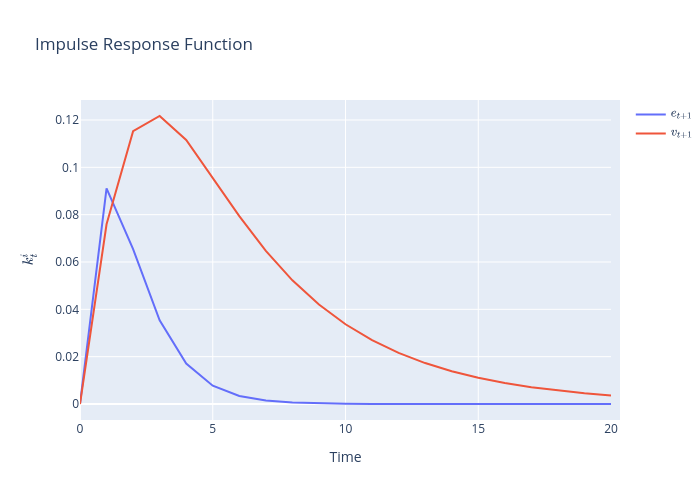

In [12]:
xcoef, ycoef = lss.impulse_response(j=21)
data = np.array([xcoef])[0, :, 1, :]

fig = go.Figure(data=go.Scatter(y=data[:-1, 0], name=r'$e_{t+1}$'))
fig.add_trace(go.Scatter(y=data[1:, 1], name=r'$v_{t+1}$'))
fig.update_layout(title=r'Impulse Response Function',
                   xaxis_title='Time',
                   yaxis_title=r'$k^{i}_{t}$')
fig1 = fig
# Export to PNG file
Image(fig1.to_image(format="png"))
# fig1.show() will provide interactive plot when running
# notebook locally

### Step 5: Compute stationary covariance matrices and population regressions

We compute stationary covariance matrices  by
calling the `stationary_distributions` method of
the `quantecon.LinearStateSpace` class.

By appropriately decomposing the covariance matrix of the state vector, we obtain ingredients
of pertinent population regression coefficients.

Define

$$
\Sigma_{x}=\left[\begin{array}{cc}
\Sigma_{11} & \Sigma_{12}\\
\Sigma_{21} & \Sigma_{22}
\end{array}\right]
$$

where $\Sigma_{11}$ is the covariance matrix of dependent variables and $\Sigma_{22}$ is the covariance matrix of independent variables.

Regression coefficients are  $\beta=\Sigma_{21}\Sigma_{22}^{-1}$.

To verify an instance of a law of large numbers computation, we construct a long  simulation of
the state vector and for the resulting sample compute
the ordinary least-squares estimator  of $\beta$ that we shall compare with corresponding population regression
coefficients.

In [13]:
_, _, Σ_x, Σ_y, Σ_yx = lss.stationary_distributions()

Σ_11 = Σ_x[0, 0]
Σ_12 = Σ_x[0, 1:4]
Σ_21 = Σ_x[1:4, 0]
Σ_22 = Σ_x[1:4, 1:4]

reg_coeffs = Σ_12 @ np.linalg.inv(Σ_22)

print('Regression coefficients (e_t on k_t, P_t, \\tilde{\\theta_t})')
print('------------------------------')
print(r'k_t:', reg_coeffs[0])
print(r'\tilde{\theta_t}:', reg_coeffs[1])
print(r'P_t:', reg_coeffs[2])

Regression coefficients (e_t on k_t, P_t, \tilde{\theta_t})
------------------------------
k_t: -3.275556845219768
\tilde{\theta_t}: -0.9649461170475454
P_t: 0.9649461170475454


In [14]:
# Compute R squared
R_squared = reg_coeffs @ Σ_x[1:4, 1:4] @ reg_coeffs  / Σ_x[0, 0]
R_squared

0.9649461170475452

In [15]:
# Verify that the computed coefficients are close to least squares estimates
model = OLS(x[0], x[1:4].T)
reg_res = model.fit()
np.max(np.abs(reg_coeffs - reg_res.params)) < 1e-2

True

In [16]:
# Verify that R_squared matches least squares estimate
np.abs(reg_res.rsquared - R_squared) < 1e-2

True

In [17]:
# Verify that θ_t + e_t can be recovered
model = OLS(y[1], x[1:4].T)
reg_res = model.fit()
np.abs(reg_res.rsquared - 1.) < 1e-6

True

## Equilibrium with Two Noisy Signals on $\theta_t$

Steps 1, 4, and 5 are identical to those for the  one-noisy-signal structure.

Step 2  requires a straightforward modification.

For step 3, we  construct the  following state-space representation so that we can get our hands on
all of the random processes that we require in order  to compute a regression of the noisy signal about
$\theta$ from the other industry that a firm receives directly in a pooling equilibrium against information that
a firm would receive in Townsend's original model.

For this purpose, we include  equilibrium goods prices from  both industries in the state vector:

$$
\begin{aligned}
\underbrace{\left[\begin{array}{c}
e_{1,t+1}\\
e_{2,t+1}\\
k_{t+1}^{i}\\
\tilde{\theta}_{t+1}\\
P_{t+1}^{1}\\
P_{t+1}^{2}\\
\theta_{t+1}\\
v_{t+1}
\end{array}\right]}_{x_{t+1}} & = \underbrace{\left[\begin{array}{cccccccc}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\frac{\kappa}{\lambda-\rho} & \frac{\kappa}{\lambda-\rho} & \tilde{\lambda} & \frac{-1}{\lambda-\rho}\frac{\kappa\sigma_{e}^{2}}{p} & 0 & 0 & \frac{\rho}{\lambda-\rho} & 0\\
-\kappa & -\kappa & 0 & \frac{\kappa\sigma_{e}^{2}}{p} & 0 & 0 & 0 & 1\\
\frac{b\kappa}{\lambda-\rho} & \frac{b\kappa}{\lambda-\rho} & b\tilde{\lambda} & \frac{-b}{\lambda-\rho}\frac{\kappa\sigma_{e}^{2}}{p} & 0 & 0 & \frac{b\rho}{\lambda-\rho}+\rho & 1\\
\frac{b\kappa}{\lambda-\rho} & \frac{b\kappa}{\lambda-\rho} & b\tilde{\lambda} & \frac{-b}{\lambda-\rho}\frac{\kappa\sigma_{e}^{2}}{p} & 0 & 0 & \frac{b\rho}{\lambda-\rho}+\rho & 1\\
0 & 0 & 0 & 0 & 0 & 0 & \rho & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{array}\right]}_{A}\underbrace{\left[\begin{array}{c}
e_{1,t}\\
e_{2,t}\\
k_{t}^{i}\\
\tilde{\theta}_{t}\\
P_{t}^{1}\\
P_{t}^{2}\\
\theta_{t}\\
v_{t}
\end{array}\right]}_{x_{t}}+\underbrace{\left[\begin{array}{ccc}
\sigma_{e} & 0 & 0\\
0 & \sigma_{e} & 0\\
0 & 0 & 0\\
0 & 0 & 0\\
\sigma_{e} & 0 & 0\\
0 & \sigma_{e} & 0\\
0 & 0 & 0\\
0 & 0 & \sigma_{v}
\end{array}\right]}_{C}\left[\begin{array}{c}
z_{1,t+1}\\
z_{2,t+1}\\
z_{3,t+1}
\end{array}\right]\\
\underbrace{\left[\begin{array}{c}
P_{t}^{1}\\
P_{t}^{2}\\
e_{1,t}+\theta_{t}\\
e_{2,t}+\theta_{t}\\
e_{1,t}\\
e_{2,t}
\end{array}\right]}_{y_{t}} & = \underbrace{\left[\begin{array}{cccccccc}
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0\\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0
\end{array}\right]}_{G}\underbrace{\left[\begin{array}{c}
e_{1,t}\\
e_{2,t}\\
k_{t}^{i}\\
\tilde{\theta}_{t}\\
P_{t}^{1}\\
P_{t}^{2}\\
\theta_{t}\\
v_{t}
\end{array}\right]}_{x_{t}}+\underbrace{\left[\begin{array}{c}
0\\
0\\
0\\
0\\
0\\
0
\end{array}\right]}_{H}w_{t+1}\\
\left[\begin{array}{c}
z_{1,t+1}\\
z_{2,t+1}\\
z_{3,t+1}\\
w_{t+1}
\end{array}\right] & \sim \mathcal{N}\left(0,I\right)\\
\kappa & = \frac{\rho p}{2p+\sigma_{e}^{2}}
\end{aligned}
$$

In [18]:
A_ricc = np.array([[ρ]])
B_ricc = np.array([[np.sqrt(2)]])
R_ricc = np.array([[σ_e ** 2]])
Q_ricc = np.array([[σ_v ** 2]])
N_ricc = np.zeros((1, 1))
p = qe.solve_discrete_riccati(A_ricc, B_ricc, Q_ricc, R_ricc, N_ricc).item()

p_two = p  # Save for comparison later

In [19]:
# Verify that p = σ_v^2 + (pρ^2σ_e^2) / (2p + σ_e^2)
tol = 1e-12
np.abs(p - (σ_v ** 2 + p * ρ ** 2 * σ_e ** 2 / (2 * p + σ_e ** 2))) < tol

True

In [20]:
κ = ρ * p / (2 * p + σ_e ** 2)
κ_prod = κ * σ_e ** 2 / p

κ_two = κ  # Save for comparison later

A_lss = np.array([[0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 0., 0., 0., 0.],
                 [κ / (λ - ρ), κ / (λ - ρ), λ_tilde, -κ_prod / (λ - ρ), 0., 0., ρ / (λ - ρ), 0.],
                 [-κ, -κ, 0., κ_prod, 0., 0., 0., 1.],
                 [b * κ / (λ - ρ), b * κ / (λ - ρ), b * λ_tilde, -b * κ_prod / (λ - ρ), 0., 0., b * ρ / (λ - ρ) + ρ, 1.],
                 [b * κ / (λ - ρ), b * κ / (λ - ρ), b * λ_tilde, -b * κ_prod / (λ - ρ), 0., 0., b * ρ / (λ - ρ) + ρ, 1.],
                 [0., 0., 0., 0., 0., 0., ρ, 1.],
                 [0., 0., 0., 0., 0., 0., 0., 0.]])

C_lss = np.array([[σ_e, 0., 0.],
                 [0., σ_e, 0.],
                 [0., 0.,  0.],
                 [0., 0.,  0.],
                 [σ_e, 0., 0.],
                 [0., σ_e, 0.],
                 [0., 0., 0.],
                 [0., 0., σ_v]])

G_lss = np.array([[0., 0., 0., 0., 1., 0., 0., 0.],
                 [0., 0, 0, 0., 0., 1., 0., 0.],
                 [1., 0., 0., 0., 0., 0., 1., 0.],
                 [0., 1., 0., 0., 0., 0., 1., 0.],
                 [1., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 1., 0., 0., 0., 0., 0., 0.]])

In [21]:
mu_0 = np.array([0., 0., 0., 0., 0., 0., 0., 0.])

lss = qe.LinearStateSpace(A_lss, C_lss, G_lss, mu_0=mu_0)

In [22]:
ts_length = 100_000
x, y = lss.simulate(ts_length, random_state=1)

In [23]:
xcoef, ycoef = lss.impulse_response(j=20)

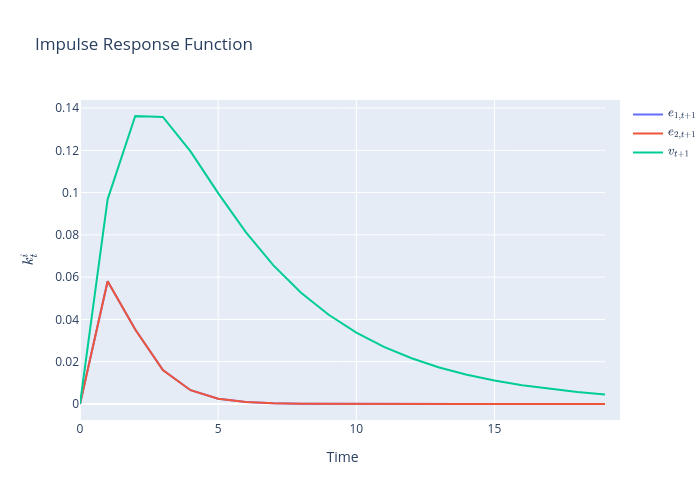

In [24]:
data = np.array([xcoef])[0, :, 2, :]

fig = go.Figure(data=go.Scatter(y=data[:-1, 0], name=r'$e_{1,t+1}$'))
fig.add_trace(go.Scatter(y=data[:-1, 1], name=r'$e_{2,t+1}$'))
fig.add_trace(go.Scatter(y=data[1:, 2], name=r'$v_{t+1}$'))
fig.update_layout(title=r'Impulse Response Function',
                   xaxis_title='Time',
                   yaxis_title=r'$k^{i}_{t}$')
fig2=fig
# Export to PNG file
Image(fig2.to_image(format="png"))
# fig2.show() will provide interactive plot when running
# notebook locally

In [25]:
_, _, Σ_x, Σ_y, Σ_yx = lss.stationary_distributions()

Σ_11 = Σ_x[1, 1]
Σ_12 = Σ_x[1, 2:5]
Σ_21 = Σ_x[2:5, 1]
Σ_22 = Σ_x[2:5, 2:5]

reg_coeffs = Σ_12 @ np.linalg.inv(Σ_22)

print('Regression coefficients (e_{2,t} on k_t, P^{1}_t, \\tilde{\\theta_t})')
print('------------------------------')
print(r'k_t:', reg_coeffs[0])
print(r'\tilde{\theta_t}:', reg_coeffs[1])
print(r'P_t:', reg_coeffs[2])

Regression coefficients (e_{2,t} on k_t, P^{1}_t, \tilde{\theta_t})
------------------------------
k_t: 0.0
\tilde{\theta_t}: 0.0
P_t: 0.0


In [26]:
# Compute R squared
R_squared = reg_coeffs @ Σ_x[2:5, 2:5] @ reg_coeffs  / Σ_x[1, 1]
R_squared

0.0

In [27]:
# Verify that the computed coefficients are close to least squares estimates
model = OLS(x[1], x[2:5].T)
reg_res = model.fit()
np.max(np.abs(reg_coeffs - reg_res.params)) < 1e-2

True

In [28]:
# Verify that R_squared matches least squares estimate
np.abs(reg_res.rsquared - R_squared) < 1e-2

True

In [29]:
_, _, Σ_x, Σ_y, Σ_yx = lss.stationary_distributions()

Σ_11 = Σ_x[1, 1]
Σ_12 = Σ_x[1, 2:6]
Σ_21 = Σ_x[2:6, 1]
Σ_22 = Σ_x[2:6, 2:6]

reg_coeffs = Σ_12 @ np.linalg.inv(Σ_22)

print('Regression coefficients (e_{2,t} on k_t, P^{1}_t, P^{2}_t, \\tilde{\\theta_t})')
print('------------------------------')
print(r'k_t:', reg_coeffs[0])
print(r'\tilde{\theta_t}:', reg_coeffs[1])
print(r'P^{1}_t:', reg_coeffs[2])
print(r'P^{2}_t:', reg_coeffs[3])

Regression coefficients (e_{2,t} on k_t, P^{1}_t, P^{2}_t, \tilde{\theta_t})
------------------------------
k_t: -3.1373589171035654
\tilde{\theta_t}: -0.924234396744368
P^{1}_t: -0.037882801627815835
P^{2}_t: 0.9621171983721839


In [30]:
# Compute R squared
R_squared = reg_coeffs @ Σ_x[2:6, 2:6] @ reg_coeffs  / Σ_x[1, 1]
R_squared

0.9621171983721838

## Key Step

Now we come to the key step for verifying that equilibrium outcomes for prices and quantities are identical
in the pooling equilibrium  original model that led Townsend to deduce an infinite-dimensional state space. 

We accomplish this by  computing a population linear least squares regression of the noisy signal that firms in the other
industry receive in a pooling equilibrium on  time $t$ information that a firm  would  receive in Townsend's
original model.

Let's compute the regression and stare at the $R^2$:

In [31]:
# Verify that θ_t + e^{2}_t can be recovered

# θ_t + e^{2}_t on k^{i}_t, P^{1}_t, P^{2}_t, \\tilde{\\theta_t}


model = OLS(y[1], x[2:6].T)
reg_res = model.fit()
np.abs(reg_res.rsquared - 1.) < 1e-6

True

In [32]:
reg_res.rsquared

1.0

The $R^2$ in this regression equals $1$.

That verifies that a firm's information
set in Townsend's original model equals its information set in a pooling equilibrium.

Therefore, equilibrium prices and quantities in Townsend's original model equal those in a pooling equilibrium.

## An observed common shock benchmark


For purposes of comparison, it is  useful to construct a model in which demand disturbance in  both industries
still both share  have a common persistent component $\theta_t$, but in which the persistent component $\theta$ is observed each period.

In this case, firms share the same information immediately and have no need to deploy signal-extraction techniques.

Thus, consider a version of our  model in which histories of both $\epsilon_t^i$ and $\theta_t$ are observed by a representative  firm.

In this case,  the firm's optimal decision rule is  described by

$$
k_{t+1}^i =  \tilde \lambda k_t^i + \frac{1}{\lambda - \rho} \hat \theta_{t+1} 
$$

where $\hat \theta_{t+1} = E_t \theta_{t+1}$ is given by

$$
\hat \theta_{t+1} = \rho \theta_t 
$$

Thus, the firm's decision rule can be expressed 


$$
k_{t+1}^i = \tilde \lambda k_t^i + \frac{\rho}{\lambda - \rho} \theta_t  
$$


Consequently, when a history  $\theta_s, s \leq t$ is observed without noise, 
the following state space system prevails:

$$
\begin{aligned}
\begin{bmatrix} \theta_{t+1} \cr k_{t+1}^i \end{bmatrix} & =
\begin{bmatrix} \rho & 0 \cr
       \frac{\rho}{\lambda -\rho} & \tilde \lambda \end{bmatrix}
       \begin{bmatrix} \theta_t \cr k_t^i \end{bmatrix} 
       + \begin{bmatrix} \sigma_v \cr 0 \end{bmatrix} z_{1,t+1} \cr
\begin{bmatrix} \theta_t \cr  k_t^i \end{bmatrix} & =  \begin{bmatrix} 1 & 0 \cr 0 & 1 \end{bmatrix}
\begin{bmatrix} \theta_t \cr k_t^i \end{bmatrix} + 
\begin{bmatrix} 0 \cr 0 \end{bmatrix} z_{1,t+1}
\end{aligned}
$$

where $z_{t,t+1} $ is a scalar iid standardized Gaussian process.

As usual, the system can be written as

$$
\begin{aligned}
x_{t+1} & = A x_t + C z_{t+1} \cr
y_t & = G x_t + H w_{t+1} 
\end{aligned}
$$

In order once again to use the  quantecon class `quantecon.LinearStateSpace`, let's form  pertinent state-space matrices

In [33]:
Ao_lss = np.array([[ρ, 0.],
                 [ρ / (λ - ρ), λ_tilde]])

Co_lss = np.array([[σ_v], [0.]])

Go_lss = np.identity(2)

In [34]:
muo_0 = np.array([0., 0.])

lsso = qe.LinearStateSpace(Ao_lss, Co_lss, Go_lss, mu_0=muo_0)

Now let's form and plot an  impulse response function of $k_t^i$ to shocks $v_t$ to $\theta_{t+1}$

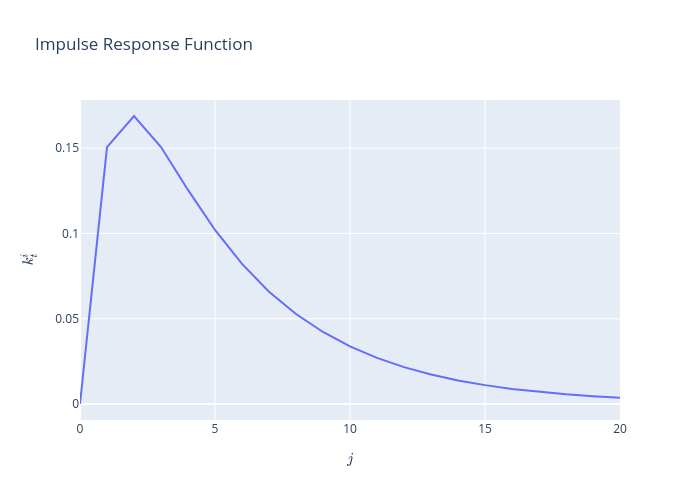

In [35]:
xcoef, ycoef = lsso.impulse_response(j=21)
data = np.array([ycoef])[0, :, 1, :]

fig = go.Figure(data=go.Scatter(y=data[:-1, 0], name=r'$z_{t+1}$'))
fig.update_layout(title=r'Impulse Response Function',
                   xaxis_title= r'lag $j$',
                   yaxis_title=r'$k^{i}_{t}$')
fig3 = fig
# Export to PNG file
Image(fig3.to_image(format="png"))
# fig1.show() will provide interactive plot when running
# notebook locally

## Comparison of  All Signal Structures

It is enlightening side by side to  plot impulse response functions for capital for the two
 noisy-signal information structures and the  noiseless signal on $\theta$ that we have just presented.

Please remember that the two-signal structure corresponds to the **pooling equilibrium** and also
**Townsend’s original model**.

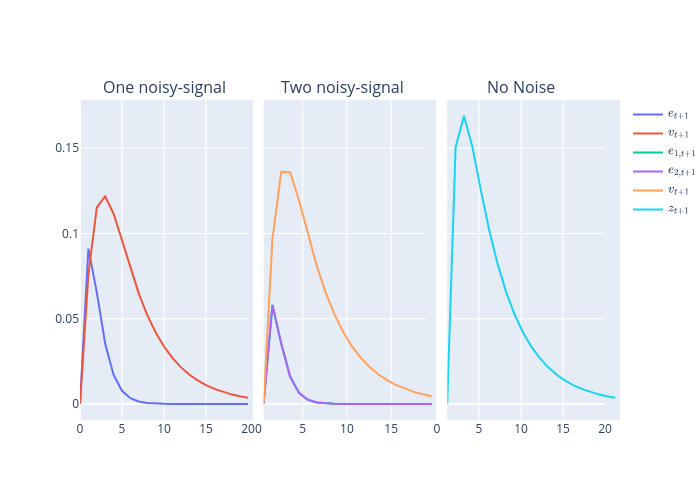

In [36]:
fig_comb = go.Figure(data=[
                        *fig1.data,
                        *fig2.update_traces(xaxis='x2', yaxis='y2').data,
                        *fig3.update_traces(xaxis='x3', yaxis='y3').data
                    ]).set_subplots(1, 3,
                           subplot_titles=("One noisy-signal",
                                           "Two noisy-signal",
                                           "No Noise"),
                           horizontal_spacing=0.02,
                           shared_yaxes=True)
# Export to PNG file
Image(fig_comb.to_image(format="png"))
# fig_comb.show() # will provide interactive plot when running
# notebook locally

The three panels in the graph above show that

-  responses of $ k_t^i $ to  shocks $ v_t $ to the hidden Markov demand state $ \theta_t $ process are   **largest** in   the no-noisy-signal structure in which the firm observes $\theta_t$ at time $t$
-  responses of $ k_t^i $ to  shocks $ v_t $ to the hidden Markov demand state $ \theta_t $ process are   **smaller** in   the two-noisy-signal structure 
-  responses of $ k_t^i $ to  shocks $ v_t $ to the hidden Markov demand state $ \theta_t $ process are   **smallest** in   the one-noisy-signal structure 

With respect to the iid demand shocks $e_t$ the graphs show that 

-  responses of $ k_t^i $ to  shocks $ e_t $ to the hidden Markov demand state $ \theta_t $ process are   **smallest** (i.e., nonexistent) in   the no-noisy-signal structure in which the firm observes $\theta_t$ at time $t$
-  responses of $ k_t^i $ to  shocks $ e_t $ to the hidden Markov demand state $ \theta_t $ process are   **larger** in   the two-noisy-signal structure  
- responses of $ k_t^i $ to idiosyncratic *own-market*   noise-shocks $ e_t $ are **largest** in the one-noisy-signal structure 




Among other things,  these  findings indicate that time series correlations and coherences between outputs in the two industries are higher in the two-noisy-signals or **pooling** model than they are in the one-noisy signal model.  

The enhanced influence of the shocks $ v_t $ to the hidden Markov demand state $ \theta_t $ process that
emerges from the two-noisy-signal model relative to the one-noisy-signal model is a  symptom of a lower
equilibrium hidden-state  reconstruction error variance in the two-signal model:

In [37]:
display(Latex('$\\textbf{Reconstruction error variances}$'))
display(Latex(f'One-noise structure: {round(p_one, 6)}'))
display(Latex(f'Two-noise structure: {round(p_two, 6)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Kalman gains  for the two
structures are

In [38]:
display(Latex('$\\textbf{Kalman Gains}$'))
display(Latex(f'One noisy-signal structure: {round(κ_one, 6)}'))
display(Latex(f'Two noisy-signals structure: {round(κ_two, 6)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Another  lesson that comes from the preceding three-panel graph is that the presence of iid noise
$\epsilon_t^i$ in industry $i$ generates a response in $k_t^{-i}$ in the two-noisy-signal structure, but not in the one-noisy-signal structure.

## Notes on History of the Problem

To truncate what he saw as an intractable, infinite dimensional  state space,
Townsend constructed an approximating model in which the common hidden Markov demand shock
is revealed to all firms  after a fixed number of periods.

Thus,

- Townsend wanted to assume that at time $ t $ firms in industry $ i $ observe
  $ k_t^i, Y_t^i, P_t^i, (P^{-i})^t $, where $ (P^{-i})^t $ is the history of prices in
  the other market up to time $ t $.  
- Because that turned out to be too challenging, Townsend made a sensible
  alternative assumption that eased his calculations: that after a large
  number $ S $ of periods, firms in industry $ i $ observe the
  hidden Markov component of the demand shock $ \theta_{t-S} $.  


Townsend argued that the more manageable model  could do a good job of
approximating the intractable model in which the Markov component of the demand shock remains unobserved
for ever.

By applying technical machinery of [[PCL86](https://python-advanced.quantecon.org/zreferences.html#id23)],
[[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)] showed that there is a recursive
representation of the equilibrium of the perpetually and symmetrically
uninformed model that Townsend wanted to solve
[[Tow83](https://python-advanced.quantecon.org/zreferences.html#id25)].

A reader of [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)] will notice that their representation of the equilibrium of
Townsend’s model exactly matches that of the  **pooling equilibrium** presented here.

We have structured  our notation in  this lecture to faciliate comparison of the **pooling equilibrium**
constructed here with the equilibrium of Townsend’s model reported in  [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)].

The computational method of [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)] is recursive:
it enlists the Kalman filter and invariant subspace methods for
solving systems of Euler
equations <sup><a href=#footnote1 id=footnote1-link>[5]</a></sup> .

As [[Sin87](https://python-advanced.quantecon.org/zreferences.html#id27)],
[[Kas00](https://python-advanced.quantecon.org/zreferences.html#id24)], and [[Sar91](https://python-advanced.quantecon.org/zreferences.html#id26)] also
found, the equilibrium is fully revealing: observed prices tell
participants in industry $ i $ all of the information held by
participants in market $ -i $ ($ -i $ means not $ i $).

This
means that higher-order beliefs play no role: observing equilibrium prices
in effect lets decision makers pool their information
sets <sup><a href=#footnote2 id=footnote2-link>[6]</a></sup> .

The disappearance of higher order beliefs means that
decision makers in this model do not really face a problem of
forecasting the forecasts of others.

Because
those forecasts are the same as their own, they know them.

### Further historical remarks

Sargent [[Sar91](https://python-advanced.quantecon.org/zreferences.html#id26)] proposed a way to compute an equilibrium
without making Townsend’s approximation.

Extending the reasoning of [[Mut60](https://python-advanced.quantecon.org/zreferences.html#id110)], Sargent noticed that it is possible to
summarize the relevant history with a low dimensional object, namely, a
small number of current and lagged forecasting errors.

Positing an
equilibrium in a space of perceived laws of motion for endogenous
variables that takes the form of a vector autoregressive, moving
average, Sargent described an equilibrium as a fixed point of a mapping
from the perceived law of motion to the actual law of motion of that
form.

Sargent worked in the time domain and proceeded to guess and verify the
appropriate orders of the autoregressive and moving average pieces of
the equilibrium representation.

By working in the frequency
domain [[Kas00](https://python-advanced.quantecon.org/zreferences.html#id24)] showed how to discover the appropriate
orders of the autoregressive and moving average parts, and also how to
compute an equilibrium.

The  [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)] recursive computational method, which stays in the time domain, also
discovered appropriate orders of the autoregressive and moving
average pieces.

In addition, by displaying equilibrium representations
in the form of [[PCL86](https://python-advanced.quantecon.org/zreferences.html#id23)], [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)]
showed how the moving average piece is linked to the innovation process
of the hidden persistent component of the demand shock.

That scalar
innovation process is the additional state variable contributed by the
problem of extracting a signal from equilibrium prices that decision
makers face in Townsend’s model.

<p><a id=footnote0 href=#footnote0-link><strong>[1]</strong></a> [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)] verified this assertion using a different tactic, namely, by constructing
analytic formulas for an equilibrium under the incomplete
information structure and confirming that they match the pooling equilibrium formulas derived here.

<p><a id=footnote3 href=#footnote3-link><strong>[2]</strong></a> See [[Sar87](https://python-advanced.quantecon.org/zreferences.html#id197)], especially
chapters IX and XIV, for  principles  that guide solving some roots backwards and others forwards.

<p><a id=footnote4 href=#footnote4-link><strong>[3]</strong></a> As noted by [[Sar87](https://python-advanced.quantecon.org/zreferences.html#id197)], this difference equation is the Euler equation for
a planning problem   that maximizes the discounted sum of consumer plus
producer surplus.

<p><a id=footnote5 href=#footnote5-link><strong>[4]</strong></a> [[PS05](https://python-advanced.quantecon.org/zreferences.html#id22)] verify the same claim by applying   machinery of  [[PCL86](https://python-advanced.quantecon.org/zreferences.html#id23)].

<p><a id=footnote1 href=#footnote1-link><strong>[5]</strong></a> See [[AHMS96](https://python-advanced.quantecon.org/zreferences.html#id135)] for an account of invariant subspace methods.

<p><a id=footnote2 href=#footnote2-link><strong>[6]</strong></a> See [[AMS02](https://python-advanced.quantecon.org/zreferences.html#id28)] for a discussion
of  information assumptions needed to create a situation
in which higher order beliefs appear in equilibrium decision rules.  A way
to read our findings in light of [[AMS02](https://python-advanced.quantecon.org/zreferences.html#id28)] is that, relative
to the number of signals agents observe,  Townsend’s
section 8 model  has too few  random shocks  to get higher order beliefs to
play a role.